In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [2]:
train_images = []
train_labels = []

for i in os.listdir('train'):
    img = mpimg.imread(f'train/{i}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img.reshape(128, 128, 1)
    img = img/255

    train_images.append(img)
    train_labels.append(i.split('.')[0])

test_images = []

for i in os.listdir('test'):
    img = mpimg.imread(f'test/{i}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img.reshape(128, 128, 1)
    img = img/255

    test_images.append(img)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state = 101)

In [5]:
X_train = np.array(X_train)

In [6]:
X_train.shape

(20000, 128, 128, 1)

In [7]:
y_train = [0 if i == 'cat' else 1 for i in y_train]
y_train = np.array(y_train)

In [8]:
y_train.shape

(20000,)

In [9]:
X_test = np.array(X_test)

In [10]:
X_test.shape

(5000, 128, 128, 1)

In [11]:
y_test = [0 if i == 'cat' else 1 for i in y_test]
y_test = np.array(y_test)

In [12]:
y_test.shape

(5000,)

In [13]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Activation

In [14]:
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

In [15]:
from keras.optimizers import Adam

In [16]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (128, 128, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 64, kernel_regularizer = l2(0.0001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

d:\ai_ml\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer = Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 32, callbacks=[early_stop])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 279ms/step - accuracy: 0.5569 - loss: 0.6933 - val_accuracy: 0.6392 - val_loss: 0.6574
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 278ms/step - accuracy: 0.6424 - loss: 0.6491 - val_accuracy: 0.6584 - val_loss: 0.6275
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 276ms/step - accuracy: 0.6655 - loss: 0.6189 - val_accuracy: 0.6758 - val_loss: 0.6079
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 278ms/step - accuracy: 0.6878 - loss: 0.5966 - val_accuracy: 0.6600 - val_loss: 0.6080
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 278ms/step - accuracy: 0.7017 - loss: 0.5833 - val_accuracy: 0.6966 - val_loss: 0.5838
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 278ms/step - accuracy: 0.7163 - loss: 0.5691 - val_accuracy: 0.6970 - val_loss: 0.5750
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 280ms/step - accuracy: 0.7367 - loss: 0.5452 - val_accuracy: 0.7142 - val_loss: 0.5609
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 280ms/step - accuracy: 

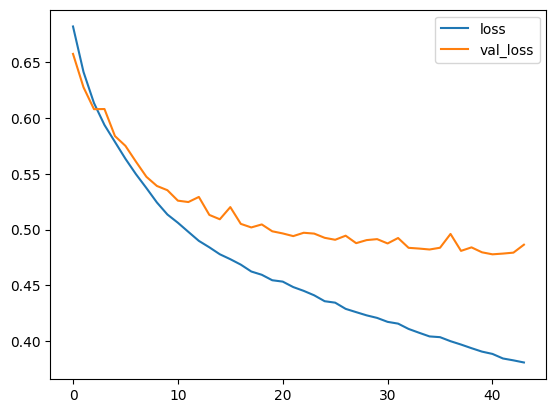

In [19]:
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')

plt.legend()
plt.show()

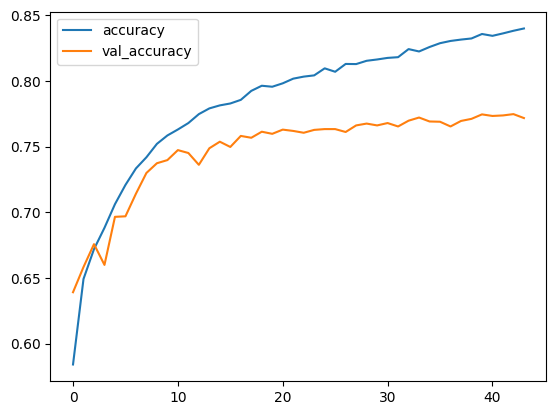

In [97]:
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')

plt.legend()
plt.show()

In [ ]:
pred_img = mpimg.imread('test_images/pred6.jpg')

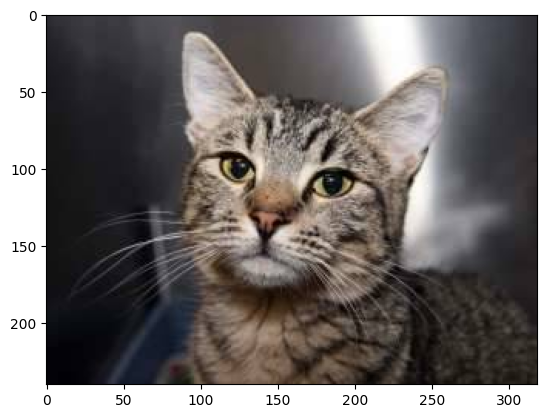

In [90]:
plt.imshow(pred_img)

In [91]:
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2GRAY)
pred_img = cv2.resize(pred_img, (128, 128))
pred_img = pred_img.reshape(1, 128, 128, 1)
pred_img = pred_img/255

In [92]:
prediction = model.predict(pred_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [93]:
prediction

array([[0.10922155]], dtype=float32)

In [94]:
if np.round(prediction)==1:
    print('Dog')
else:
    print('Cat')

Cat


In [95]:
model.save('dogs_vs_cats_h5.h5')

In [82]:
import pickle

In [96]:
with open('dogs_vs_cats_pkl.pkl', 'wb') as file:
    pickle.dump(model, file)

In [84]:
def pred_interface(link):
    p_img = mpimg.imread(link)
    p_img = cv2.cvtColor(p_img, cv2.COLOR_BGR2GRAY)
    p_img = cv2.resize(p_img, (128, 128))
    p_img = p_img.reshape(1, 128, 128, 1)
    p_img = p_img/255

    pred = model.predict(p_img)
    return pred

In [ ]:
pred_interface('test_images/pred2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.19529785]], dtype=float32)